## **Problem Statement: Navigating the Data Science Job Landscape**

🚀 Unleash your creativity in crafting a solution that taps into the heartbeat of the data science job market! Envision an ingenious project that seamlessly wields cutting-edge web scraping techniques and illuminating data analysis.

🔍 Your mission? To engineer a tool that effortlessly gathers job listings from a multitude of online sources, extracting pivotal nuggets such as job descriptions, qualifications, locations, and salaries.

🧩 However, the true puzzle lies in deciphering this trove of data. Can your solution discern patterns that spotlight the most coveted skills? Are there threads connecting job types to compensation packages? How might it predict shifts in industry demand?

🎯 The core objectives of this challenge are as follows:

1. Web Scraping Mastery: Forge an adaptable and potent web scraping mechanism. Your creation should adeptly harvest data science job postings from a diverse array of online platforms. Be ready to navigate evolving website structures and process hefty data loads.

2. Data Symphony: Skillfully distill vital insights from the harvested job listings. Extract and cleanse critical information like job titles, company names, descriptions, qualifications, salaries, locations, and deadlines. Think data refinement and organization.

3. Market Wizardry: Conjure up analytical tools that conjure meaningful revelations from the gathered data. Dive into the abyss of job demand trends, geographic distribution, salary variations tied to experience and location, favored qualifications, and emerging skill demands.

4. Visual Magic: Weave a tapestry of visualization magic. Design captivating charts, graphs, and visual representations that paint a crystal-clear picture of the analyzed data. Make these visuals the compass that guides users through job market intricacies.

🌐 While the web scraping universe is yours to explore, consider these platforms as potential stomping grounds:

* LinkedIn Jobs








In [ ]:
#import library

import requests
from bs4 import BeautifulSoup
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
#joblist url

url = 'https://www.linkedin.com/jobs/search/?keywords=data%20scientist&location=United%20States'

In [ ]:
headers = {
    'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/96.0.4664.110 Safari/537.36'
}

In [ ]:
#extract data from url and convert into dataframe
response = requests.get(url, headers=headers)
soup = BeautifulSoup(response.content, 'html.parser')

job_listings = soup.find_all(class_='job-search-card')

data = []
for i, listing in enumerate(job_listings, start=1):
    title = listing.find('h3', class_='base-search-card__title').text.strip()
    company = listing.find('h4', class_='base-search-card__subtitle').text.strip()
    location = listing.find('span', class_='job-search-card__location').text.strip()
    data.append({'Title': title, 'Company': company, 'Location': location})

df = pd.DataFrame(data)
print(df)

                                        Title                 Company  \
0                   Machine Learning Engineer                Hirewell   
1         Machine Learning Engineer - Product                Nextdoor   
2                              Data Scientist                    Cint   
3                              Data Scientist  GDC IT Solutions (GDC)   
4                       Senior Data Scientist            Fusemachines   
5                              Data Scientist         Curate Partners   
6                              Data Scientist               Analytica   
7                     Data Scientist (Hybrid)     Enova International   
8                 Data Scientist- USA- Remote          eStaffing Inc.   
9                              Data Scientist                     257   
10                             Data Scientist            UrBench, LLC   
11                             Data Scientist               Analytica   
12  Staff Data Scientist, Strategy & Insights      

In [ ]:
# Save data to a CSV file
df.to_csv('job_listings.csv', index=False)

In [ ]:
#dataset first view
dataset = pd.read_csv('job_listings.csv')
dataset

,Title,Company,Location
0,Machine Learning Engineer,Hirewell,United States
1,Machine Learning Engineer - Product,Nextdoor,"San Francisco, CA"
2,Data Scientist,Cint,"New York, NY"
3,Data Scientist,GDC IT Solutions (GDC),"Carlisle, PA"
4,Senior Data Scientist,Fusemachines,"New York, NY"
5,Data Scientist,Curate Partners,"Boston, MA"
6,Data Scientist,Analytica,United States
7,Data Scientist (Hybrid),Enova International,"Chicago, IL"
8,Data Scientist- USA- Remote,eStaffing Inc.,United States
9,Data Scientist,257,"New York, United States"


In [ ]:
# Display the first few rows of the dataset
dataset.head()

,Title,Company,Location
0,Machine Learning Engineer,Hirewell,United States
1,Machine Learning Engineer - Product,Nextdoor,"San Francisco, CA"
2,Data Scientist,Cint,"New York, NY"
3,Data Scientist,GDC IT Solutions (GDC),"Carlisle, PA"
4,Senior Data Scientist,Fusemachines,"New York, NY"


In [ ]:
#Rows & Columns count
dataset.shape

(24, 3)

In [ ]:
#basic information about the dataset
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Title     24 non-null     object
 1   Company   24 non-null     object
 2   Location  24 non-null     object
dtypes: object(3)
memory usage: 704.0+ bytes


In [ ]:
#Duplicate Value Count

len(dataset[dataset.duplicated()])

0

In [ ]:
# Missing Values/Null Values Count

print(dataset.isnull().sum())

Title       0
Company     0
Location    0
dtype: int64


<Axes: >

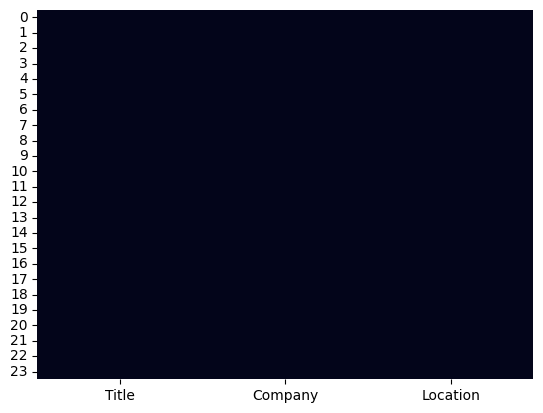

In [ ]:
# Visualizing the missing values
# Checking Null Value by plotting Heatmap

sns.heatmap(dataset.isnull(), cbar=False)

##**Understanding Your Variables**

In [ ]:
# Dataset Columns

dataset.columns

Index(['Title', 'Company', 'Location'], dtype='object')

In [ ]:
# Dataset Describe
dataset.describe(include='all')

,Title,Company,Location
count,24,24,24
unique,12,23,14
top,Data Scientist,Analytica,United States
freq,12,2,7


In [ ]:
# Check Unique Values for each variable.

for i in dataset.columns.tolist():
  print("No. of unique values in ",i,"is",dataset[i].nunique(),".")

No. of unique values in  Title is 12 .
No. of unique values in  Company is 23 .
No. of unique values in  Location is 14 .


##**Visualization**

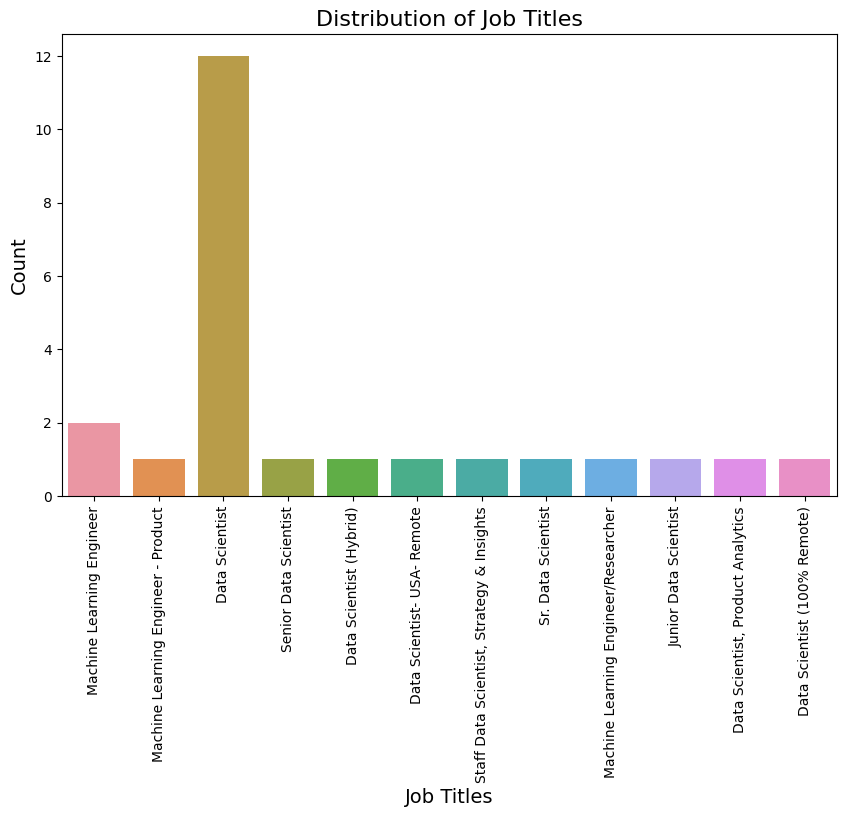

<Figure size 1000x600 with 0 Axes>

In [ ]:
# Countplot of Job Titles
plt.figure(figsize=(10,6))
sns.countplot(data=dataset, x='Title')
plt.xlabel('Job Titles', fontsize=14)
plt.xticks(rotation=90)
plt.ylabel('Count', fontsize=14)
plt.title('Distribution of Job Titles', fontsize=16)
plt.show()


plt.figure(figsize=(10,6))
labels = ['Less than 1 year', '1-3 years', '3-5 years', '5-7 years', '7+ years']
colors = ['#007bff', '#6610f2', '#8b0000', '#e83e8c', '#778899']
plt.show()

##**Insight**

Looks like looking at the chart. Looks the highest job offer is for data scientists.


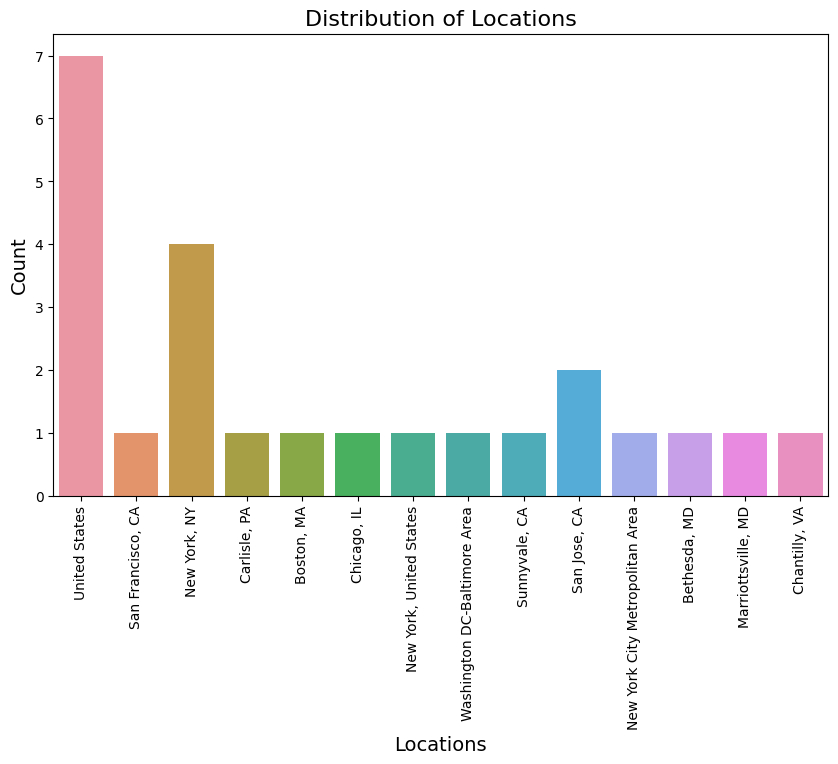

<Figure size 1000x600 with 0 Axes>

In [ ]:
# Countplot of Locations
plt.figure(figsize=(10,6))
sns.countplot(data=dataset, x='Location')
plt.xlabel('Locations', fontsize=14)
plt.xticks(rotation=90)
plt.ylabel('Count', fontsize=14)
plt.title('Distribution of Locations', fontsize=16)
plt.show()


plt.figure(figsize=(10,6))
labels = ['Less than 1 year', '1-3 years', '3-5 years', '5-7 years', '7+ years']
colors = ['#007bff', '#6610f2', '#8b0000', '#e83e8c', '#778899']
plt.show()

##**Insight**

Looking at the chart, it Seems that most of the jobs are in the United States.